<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Insaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
df = pd.read_csv('/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [57]:
df.isnull().sum()     # Checking for any missing data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [58]:
df = df.dropna()      # Droping all NaN values

In [59]:
df.amount.describe()  # Describes various Statistical factors

count    1.132653e+06
mean     1.605160e+05
std      2.739819e+05
min      1.000000e-01
25%      1.213039e+04
50%      7.583712e+04
75%      2.145810e+05
max      1.000000e+07
Name: amount, dtype: float64

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# Detecting Outliers through visualisations

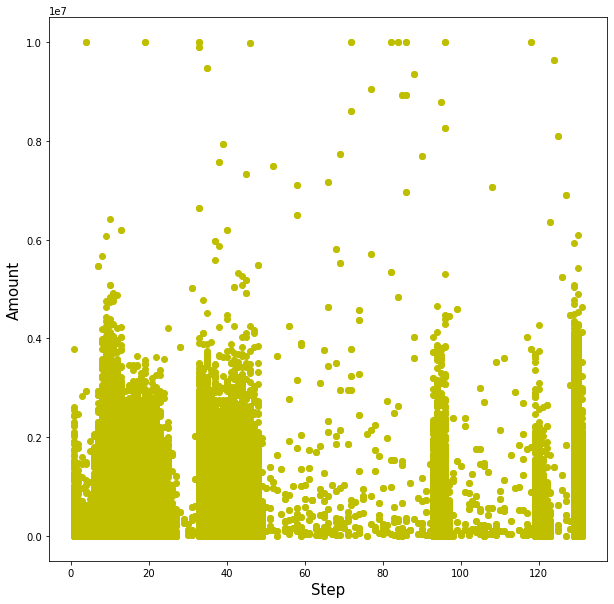

In [93]:
plt.scatter(df.step, df.amount, color='y')
plt.xlabel('Step',size=15)
plt.ylabel('Amount', size=15)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In the above scatter plot we can see that some of the data point are away from other data points. Thus, these points are the anomaly and most likely these are the 'Fraud' transactions. But, we can't say much from such a plot and will need a deep analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


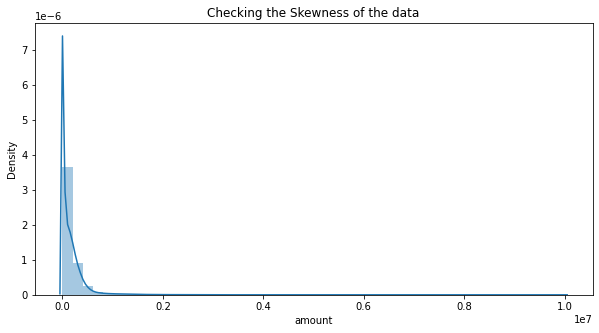

In [92]:
p = sns.distplot(df['amount']).set(title='Checking the Skewness of the data')  # Highly Right Skewed Data
#plt.ylim([0,10**(-8)])
#plt.xlim(0,3*10**7)
plt.rcParams['figure.figsize'] = [10,10]

The tail of the amount of transaction distribuation is towards right, so this a 'Right Skewed Gaussian Data'. In such a dataset, the 'median' is more meaningfull than the 'mean'.

In [63]:
df.groupby('isFraud')['isFraud'].agg('count')

isFraud
0.0    1131159
1.0       1494
Name: isFraud, dtype: int64

As, the number of fraud transactions are very less as compared to the normal transactions, this is an **Imbalanced Class**. Thus, accuracy score of any model will be very high and comapreble to the '**Dummy Classifier**'.

In [64]:
# Preprocessing and Cleaning Process

Fraud = df[df['isFraud'] == 1]    
Normal = df[df['isFraud']==0]
df1 = df.copy()
df1 = pd.get_dummies(df1,columns=['type'])
df2 = df1.copy()
df2.drop(['nameOrig','nameDest'],axis=1,inplace=True)
x = df2.drop(['isFraud','isFlaggedFraud'],axis=1)
y = df2.isFraud

# Statistical measures of the Fraud  & Normal transactions

In [65]:
Fraud.amount.describe()

count    1.494000e+03
mean     1.211544e+06
std      2.017052e+06
min      1.190000e+02
25%      9.869272e+04
50%      3.732614e+05
75%      1.318606e+06
max      1.000000e+07
Name: amount, dtype: float64

In [66]:
Normal.amount.describe()

count    1.131159e+06
mean     1.591278e+05
std      2.614084e+05
min      1.000000e-01
25%      1.211264e+04
50%      7.566275e+04
75%      2.142340e+05
max      6.419835e+06
Name: amount, dtype: float64

# Checking the amounts for Fraud vs Normal transations

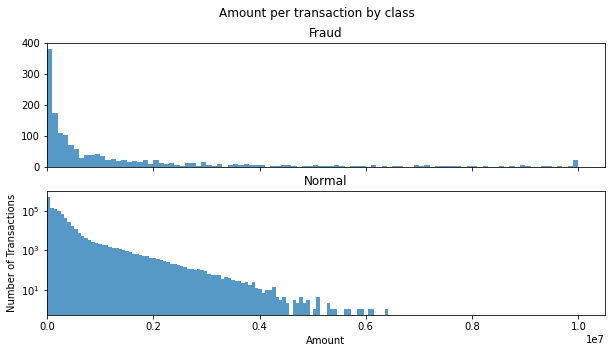

In [67]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Amount per transaction by class')
bins = 100
ax1.hist(Fraud.amount, bins = bins,alpha=0.75)
ax1.set_title('Fraud')
ax2.hist(Normal.amount, bins = bins,alpha=0.75)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.rcParams['figure.figsize'] = [10, 5]
#plt.grid(True)
#ax1.grid(True)
plt.xlim([0,None])
plt.show()

The above plot compares the amount of 'Normal' vs 'Fraud' transactions. This shows fraudalent transactions are less in counts, but still have statistical significance.

# Model Selection Process

So, as we can see that this dataset contains Categorical as well as Numeric data, it will be good to use a 
**'Descision Tree Classifier'**. But, we have many optimised versions of the 'Descision Tree Classifier', we will use them one by one any evalute the best model upon the performance metrics.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)           # Diving the dataset into training and testing dataset

In [69]:
outlier_fraction = len(Fraud)/len(Normal)

In [70]:
Isf = IsolationForest(contamination=outlier_fraction, max_samples=len(x_train), verbose=0, n_estimators=100)
loc = LocalOutlierFactor(contamination=outlier_fraction)
svm = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xg = XGBClassifier()
Ada = AdaBoostClassifier()

In [71]:
y_prec = loc.fit_predict(x_test)
Isf.fit(x_train,y_train)
y_pred = Isf.predict(x_test)
svm.fit(x_train,y_train)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


# Choosing the right evaluation Metrics

We have to choose a different evaluation matrics other than the '**Accuracy**'. This is because, in an imbalanced dataset, the **'Accuracy Score'** might not be meaningfull or might not help in specific instances. For, this particular instance, we would like
to detect the 'Fraudlent' transactions, by keeping in mind that no '**Normal**' transaction is refered as '**Fraudlent**'. Also, no '**Fraudlent**' transaction should be refered as '**Noraml**'. These are also called the '**Type-I Error** and  '**Type-II Error** in statistics.
         

  # Prescision, Recall & Area Under Curve (AUC)
  '**Precesion**' and '**Recall**' are the evaluation metrics very usefull for specific purposes. '**Precesion**' is the ratio of '**True Positive**' and the sum of both '**True** **Positive**' and '**False** **Positive**'. Here, the '**True Positive**' is **Fraud Detection**. Similarly, in 'Recall' instead of '**False Positive**' it is '**False Negetive**'. Now, by keeping a '**Descision Thersold**', we will get different values of the both. And, if we plot them, we get a curve also known as the '**ROC**'. The area under this curve is important, because it's a measure of the desirable values of the both 'Precesion' and 'Recall'. This is also called the **Area Under Curve (AUC)**. 

# Choosing the best model w.r.t the AUC score

In [37]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_score

In [72]:
accuracy_score(y_test, y_pred)  # Isolation Forest

0.9975867873665376

In [74]:
y_prec[y_prec == 1] = 0
y_prec[y_prec == -1] = 1
accuracy_score(y_test, y_prec)   # Local Outlier Factor

0.9987021624739549

In [75]:
svm.score(x_test,y_test)        # SVM

0.9990023425820198

In [76]:
y_presvm = svm.predict(x_test)  # SVM 
roc_auc_score(y_test,y_presvm)

0.6179108854328863

In [77]:
roc_auc_score(y_test,y_pred)    # Isolation Forest

0.5526603205607703

In [78]:
roc_auc_score(y_test, y_prec)   # Local Outlier Factor

0.5

In [79]:
rf.fit(x_train,y_train)         # Random Forest
y_prerf = rf.predict(x_test)

In [80]:
accuracy_score(y_test,y_prerf)  # Random Forest

0.9997233634298226

In [81]:
                                # Random Forest (Best Score)
roc_auc_score(y_test,y_prerf)   

0.9036148574638609

In [82]:
gb.fit(x_train,y_train)         # Gradiant Boost
y_pregb = gb.predict(x_test)    

In [83]:
accuracy_score(y_test,y_pregb)  # Gradiant Boost

0.9993525527080954

In [84]:
roc_auc_score(y_test,y_pregb)    # gradiant Boost  

0.7969917454784755

In [85]:
xg.fit(x_train,y_train)          # Xg Boost
y_prexg = xg.predict(x_test)

In [86]:
accuracy_score(y_test,y_prexg)   # Xg Boost

0.9996703904695758

In [87]:
roc_auc_score(y_test,y_prexg)    # Xg Boost (2nd Best Score)

0.8798097538043276

In [88]:
Ada.fit(x_train,y_train)          # Ada Boost
y_preaba = Ada.predict(x_test)

In [90]:
accuracy_score(y_test,y_preaba)   # Ada Boost 

0.9994467268596452

In [91]:
roc_auc_score(y_test,y_preaba)    # Ada Boost (3rd Best Score)

0.8015681476040097

AS, we compared many ML classifiers to see which one will be best for the detection of the fraud. Although, the model accuracy score was very high for all the models, which is a clear sign of an **imbalaned class**. So, the names of the ML models according to their best **AUC scores** are:

(i)  Random Forest

(ii) Xg Boost

(iii)  Ada Boost

(iv) Gradiant Boost

(v) SVM

# Conclusions

Thus, we can use '**Random Forest Classifier**' to detect the fraudalent transaction for this dataset. This model will ensure that maxmimum fraud transactions are detected, while keeping in mind that we are minimizing the declaration of a normal transtion as fradulant.

While updating the infrastructure, the company should protect its old data, like it should keep the 'features names' very secret on which the fraud detection is being made. If new features are being added, then a Principal Component Analysis (PCA) to make best choices. This should also be compared to the old model for chosing a better model. 

# Note

AS the dataset is very large and due to constrains of the Goggle Colab, a sample of the original data has been used for the model building and analysis. 